## IMPORT REQUIRED LIBRARIES

In [1]:

import pandas as pd
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

## LOAD THE DATA

In [2]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=RELIANCE.BSE&outputsize=full&apikey=AUPPYZ3PTCAM6OO3&datatype=csv'
data = pd.read_csv(url)

#### We used the API provided by www.alphavantage.co and imported it using pandas

## DATA DESCRIPTION

In [3]:
data.head()

,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
0,2023-03-29,2241.8999,2245.0,2211.25,2235.25,2235.25,159031,0.0,1.0
1,2023-03-28,2241.2500,2256.0,2237.50,2247.95,2247.95,113718,0.0,1.0
2,2023-03-27,2215.5000,2254.0,2200.50,2237.50,2237.50,315446,0.0,1.0
3,2023-03-24,2247.6001,2250.0,2198.00,2203.50,2203.50,178216,0.0,1.0
4,2023-03-23,2270.0000,2270.0,2243.75,2247.55,2247.55,208447,0.0,1.0


In [4]:
data.describe()

,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
count,4496.000000,4496.000000,4496.000000,4496.000000,4496.000000,4.496000e+03,4496.000000,4496.000000
mean,1332.587882,1350.390301,1314.236970,1331.732666,804.928607,3.103294e+06,0.018531,1.000447
std,619.745919,629.413952,610.056937,619.678740,710.217191,2.117436e+07,0.311232,0.021089
min,377.517600,381.517100,372.434300,374.826500,80.531600,4.245200e+04,0.000000,1.000000
25%,893.924700,903.712200,883.149700,892.824700,383.322025,4.533540e+05,0.000000,1.000000
50%,1064.999700,1078.899650,1051.399700,1064.724700,471.846550,9.339685e+05,0.000000,1.000000
75%,1771.749425,1806.011975,1748.024400,1777.011975,1069.240175,2.690412e+06,0.000000,1.000000
max,3215.999000,3252.099100,3135.249100,3216.299000,2810.735400,8.021841e+08,8.000000,2.000000


## PREPARING THE DATA TO FIT INTO THE MODEL

In [5]:
data = data.drop(['adjusted_close'], axis=1)
data['timestamp'] = data['timestamp'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').toordinal())

## SPLIT INTO INPUT AND TARGET

In [6]:
X = data.drop(['close'], axis=1)
y = data['close']

## USING GRIDSEARCHCV TO FIND THE BEST PARAMETERS

In [7]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [8]:
rf = RandomForestRegressor()

In [9]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

## FITTING THE MODEL

In [10]:
rf = RandomForestRegressor(n_estimators=grid_search.best_params_['n_estimators'],
                            max_depth=grid_search.best_params_['max_depth'],
                            min_samples_split=grid_search.best_params_['min_samples_split'],
                            min_samples_leaf=grid_search.best_params_['min_samples_leaf'])

rf.fit(X, y)

RandomForestRegressor(max_depth=15, min_samples_leaf=2, n_estimators=300)

## PLOTTING PREDICTED AGAINST THE ACTUAL DATA

In [11]:
y_pred = rf.predict(X)
data['timestamp'] = data['timestamp'].apply(lambda x: datetime.fromordinal(x))
df = pd.DataFrame({'timestamp': data['timestamp'], 'actual': y, 'predicted': y_pred})
fig = px.line(df, x='timestamp', y=['actual', 'predicted'], title='Actual vs Predicted Close')
fig.show()

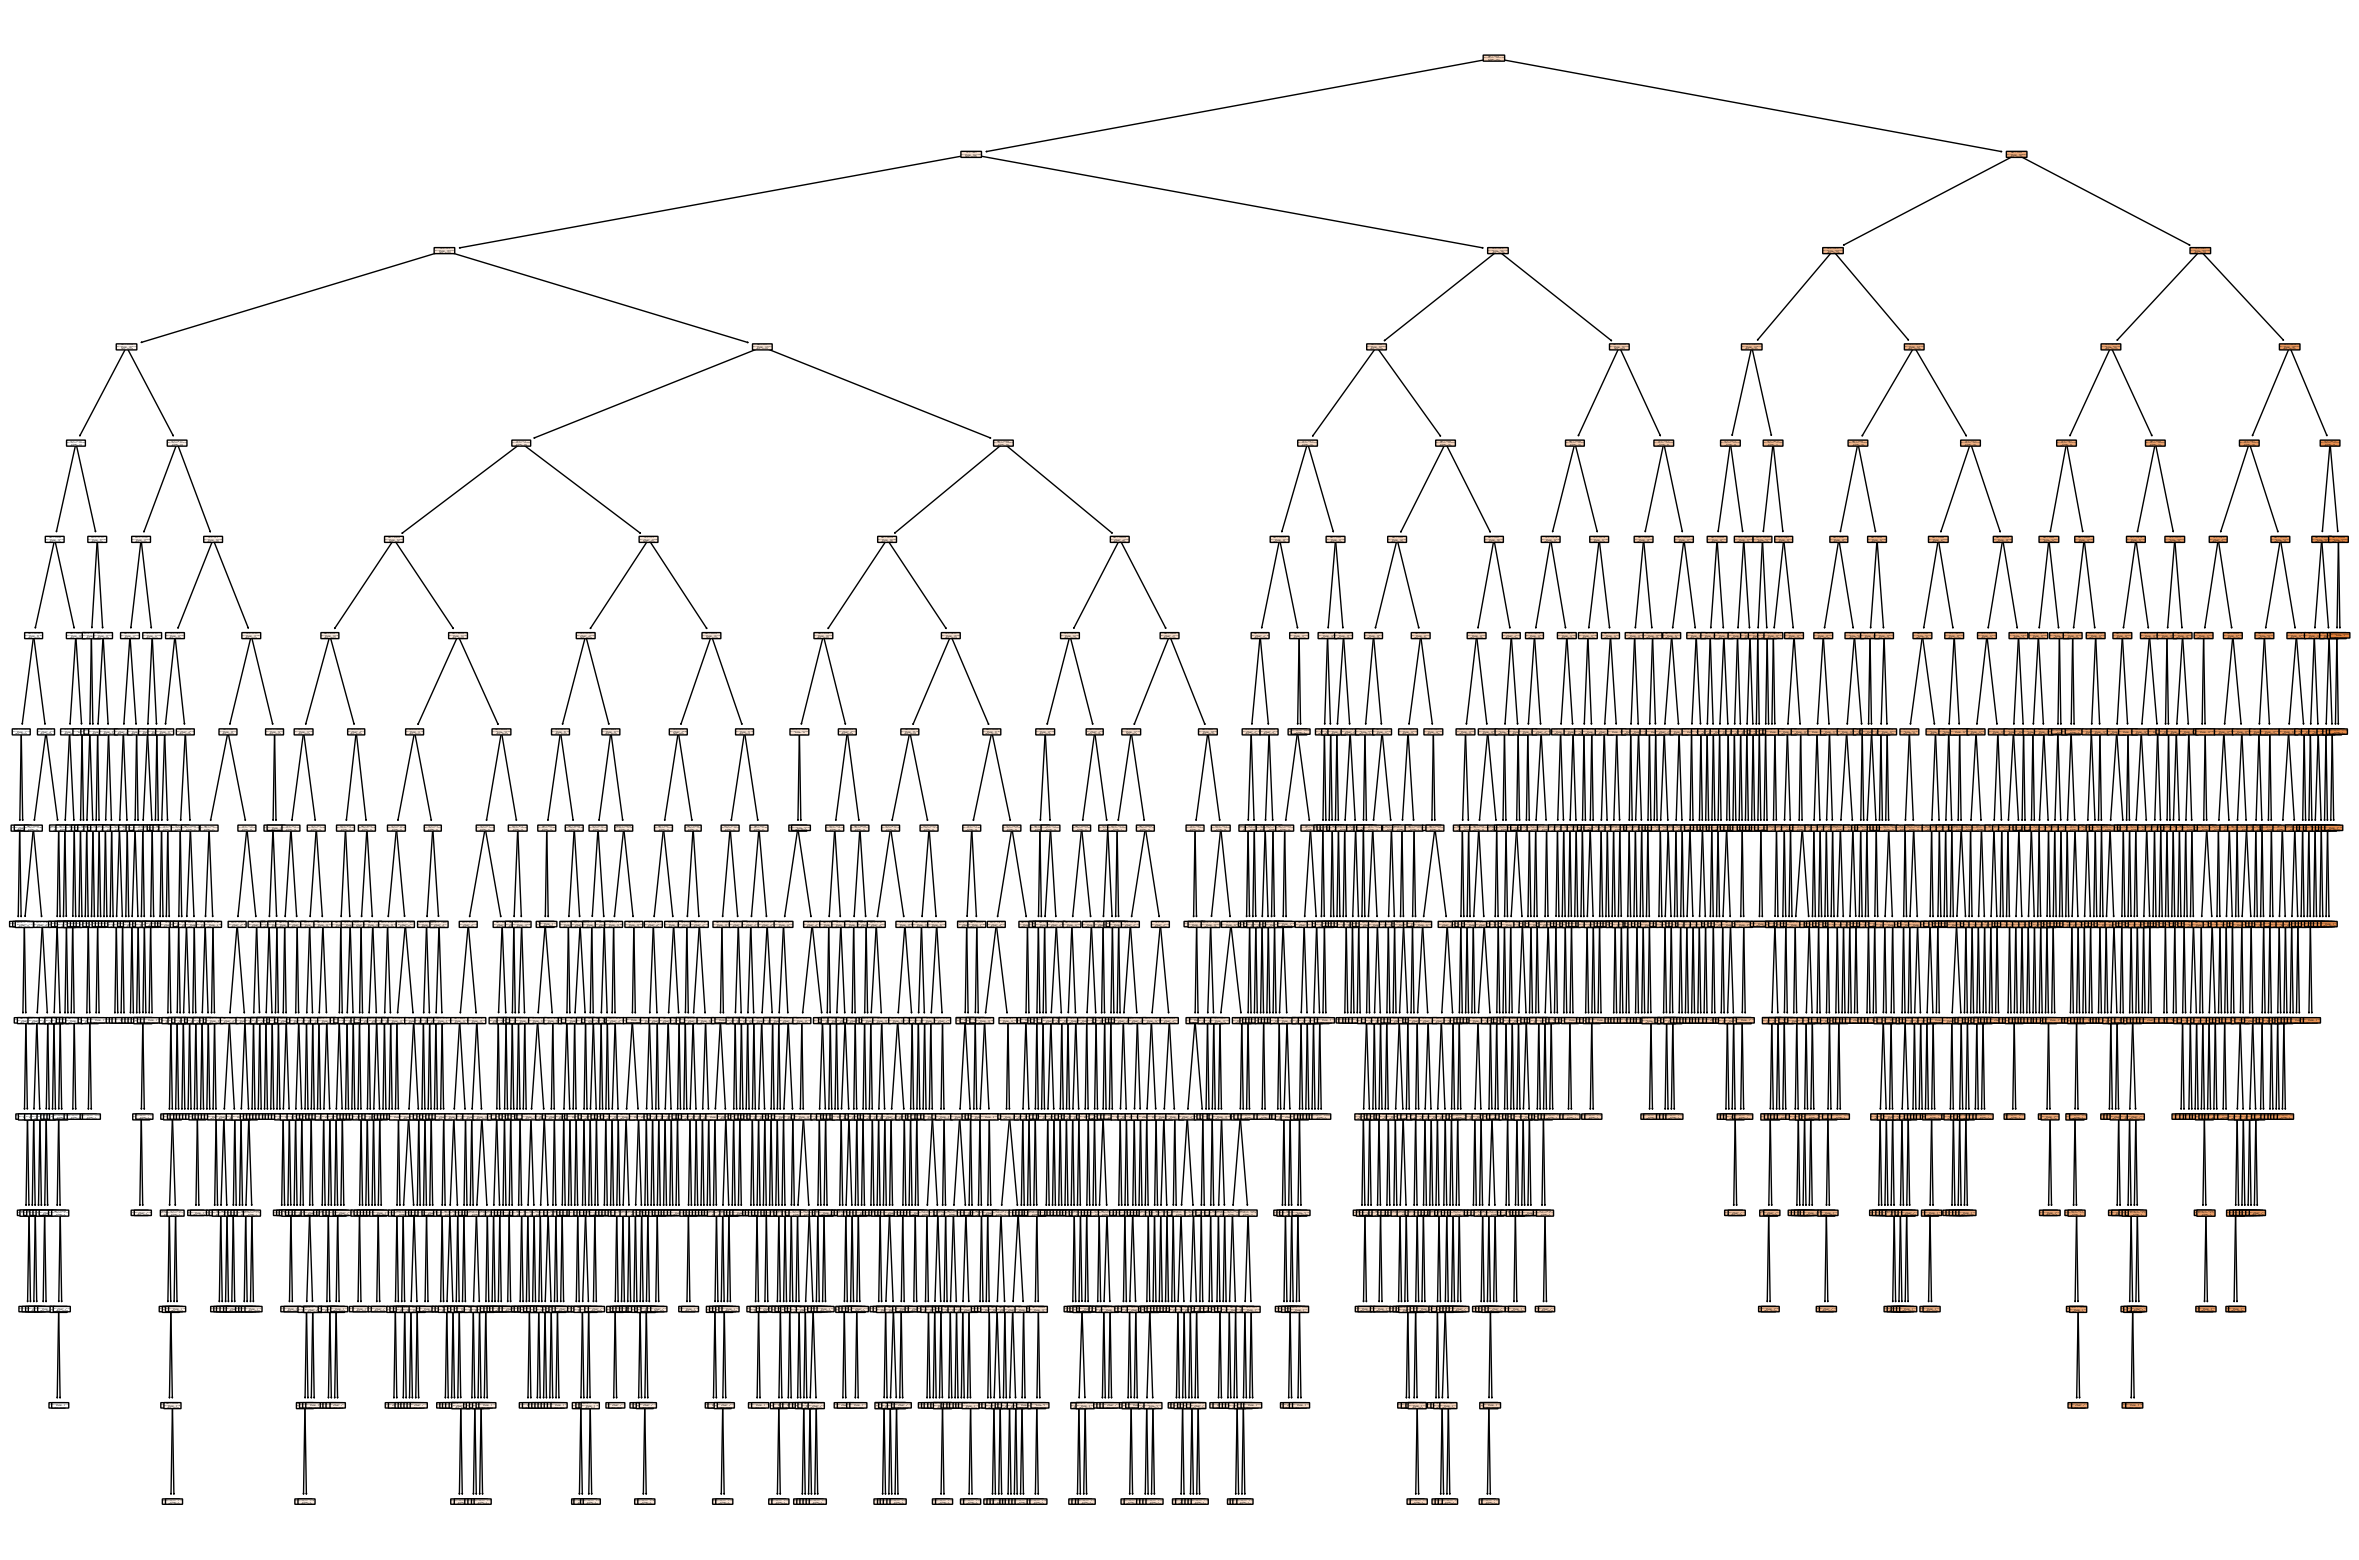

In [17]:
fig = plt.figure(figsize=(30, 20))
plot_tree(rf.estimators_[0], 
          feature_names=X.columns,
          class_names="test", 
          filled=True, impurity=True, 
          rounded=True)
plt.show()

## PREDICTING FOR A RANDOM VALUE

In [ ]:
ordinal = datetime.strptime('2023-03-27', '%Y-%m-%d').toordinal()
predicted_close = rf.predict([[ordinal, data['open'][0], data['high'][0], data['low'][0], data['volume'][0], data['dividend_amount'][0], data['split_coefficient'][0]]])[0]
print('Predicted Close:', predicted_close,ordinal)

actual_close = data.iloc[0]['close']
print('Actual Close:', actual_close)

Predicted Close: 2236.1539665357136 738606
Actual Close: 2237.5
